# Importar Bibliotecas

In [1]:
import itertools
import pprint	
import random

import numpy as np
import pandas as pd	

import networkx as nx    # https://networkx.org/documentation/stable/index.html
from matplotlib import pyplot as plt


# Funciones

#### añadir_conexiones()

In [12]:
def añadir_conexiones(g, pr): 
    for nodo in g.nodes(): 
        for nodo1 in g.nodes(): 
            if (nodo != nodo1): 
                ra = random.random() 
                if (ra < pr): 
                    g.add_edge(nodo, nodo1) 
                else: 
                    continue
    return g 

#### PageRank_caminata_aleatoria()

# PageRank con conjunto de datos sintéticos

Crear un grafo dirigido con N vértices y aristas

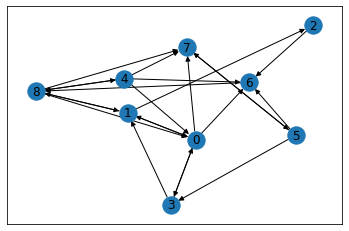

In [15]:
#Crear grafica usando la biblioteca networkx
g = nx.DiGraph() 

#Añadir vertices
N = 9
g.add_nodes_from(range(N)) 

# Agregar aristas
g = añadir_conexiones(g, 0.4) 

#Ver la gráfica
nx.draw_networkx(g, with_labels=True)	

In [11]:
print('Nodos:', g.nodes())
print('\nNúmero de Nodos:', g.number_of_nodes())
print('\nTotal de Vertices:',g.number_of_edges())


Nodos: [0, 1, 2, 3, 4, 5, 6, 7, 8]

Número de Nodos: 9

Total de Vertices: 21


In [16]:
g.out_edges

OutEdgeView([(0, 1), (0, 3), (0, 6), (0, 7), (1, 0), (1, 2), (1, 8), (2, 6), (3, 0), (3, 1), (4, 0), (4, 6), (4, 7), (4, 8), (5, 3), (5, 6), (5, 7), (6, 8), (7, 5), (8, 0), (8, 1), (8, 4), (8, 7)])

In [17]:
g.out_edges(1)

OutEdgeDataView([(1, 0), (1, 2), (1, 8)])

Page Rank, utilizando caminata aleatoria

In [27]:
def PageRank_caminata_aleatoria_01(g, n_iter, caminatas):

      nodos = list(g.nodes()) 

      caminatas_df = pd.DataFrame(np.zeros((caminatas, len(nodos))),
                                  columns = nodos,
                                  index = ['Caminata_{}'.format(n+1) for n in range(caminatas)])
  
      for n in range(caminatas):
          #inicialiaemos en 0 los cuenta para cada nodo
          cuenta = np.zeros_like(nodos)
  
          #escojemos un nodo aleatoriamente, probabilidad uniforme
          nod = random.choice(nodos)
          cuenta[nod] += 1

          #lista de vecinos a donde ir, probabilidad uniforme
          vecinos = list(g.out_edges(nod)) 

          #iterar n_iter veces
          z = 1
          while (z != n_iter): 
              #Si no hay vecinos escogemos cualquier vecino al azar
              if (len(vecinos) == 0):        
                  siguiente = random.choice(nodos) 
              else:
                  nod1 = random.choice(vecinos) 
                  siguiente = nod1[1] 
              cuenta[siguiente] += 1
              vecinos = list(g.out_edges(siguiente)) 
              z += 1

          #Obtenemos los pesos de cada nodo
          pesos = np.array(cuenta)/n_iter   #vector r

          #Guardamos los resultados en una tabla ordenada por pesos
          caminatas_df.loc['Caminata_{}'.format(n+1)] = pesos 
          
          #promediar y sacar el rank
      vec_r = caminatas_df.mean()
      rank = vec_r.sort_values(ascending=False).index.to_numpy()
      return caminatas_df, vec_r.to_dict()


In [35]:
pesos_df, pesos_dict = PageRank_caminata_aleatoria_01(g, n_iter = 200, caminatas= 4000)
pesos_dict

{0: 0.1360637499999983,
 1: 0.11828625000000108,
 2: 0.039598750000000286,
 3: 0.0793449999999993,
 4: 0.04537375000000013,
 5: 0.13521874999999897,
 6: 0.13007749999999835,
 7: 0.13537624999999895,
 8: 0.1806599999999975}

In [36]:
pesos_df

,0,1,2,3,4,5,6,7,8
Caminata_1,0.105,0.120,0.060,0.055,0.055,0.125,0.160,0.125,0.195
Caminata_2,0.165,0.105,0.045,0.060,0.040,0.125,0.155,0.125,0.180
Caminata_3,0.130,0.150,0.040,0.060,0.035,0.125,0.130,0.125,0.205
Caminata_4,0.165,0.180,0.055,0.070,0.035,0.075,0.130,0.075,0.215
Caminata_5,0.150,0.100,0.055,0.090,0.050,0.105,0.150,0.105,0.195
...,...,...,...,...,...,...,...,...,...
Caminata_3996,0.175,0.145,0.055,0.095,0.045,0.085,0.130,0.085,0.185
Caminata_3997,0.135,0.120,0.035,0.095,0.050,0.140,0.115,0.140,0.170
Caminata_3998,0.120,0.115,0.035,0.080,0.040,0.135,0.145,0.135,0.195
Caminata_3999,0.165,0.155,0.035,0.100,0.045,0.105,0.115,0.105,0.175


In [29]:
pesos_dict2 = nx.pagerank(g) 
pesos_dict2

{0: 0.13276836121342941,
 1: 0.11650656708629559,
 2: 0.04967682504315571,
 3: 0.0808025588684323,
 4: 0.0539519397446749,
 5: 0.12678727145585109,
 6: 0.13449277199738352,
 7: 0.12955268636614484,
 8: 0.17546101822463253}

## PageRank de las páginas de la Universidad de Stanford (2002)

* grafico https://snap.stanford.edu/data/web-Stanford.html
* matriz https://www.cise.ufl.edu/research/sparse/matrices/SNAP/web-Stanford.html



In [21]:
from scipy.io import mmread

M = mmread("/content/drive/MyDrive/Datos/Web-Stanford/web-Stanford/web-Stanford.mtx")
M.shape

(281903, 281903)

In [22]:
G = nx.from_scipy_sparse_array(M, parallel_edges=True, create_using=nx.DiGraph)
print('\nNúmero de Nodos:', G.number_of_nodes())
print('\nTotal de Vertices:',G.number_of_edges())


Número de Nodos: 281903

Total de Vertices: 2312497


In [34]:
## tarda como 4 min
# caminatas_df, pesos_dict = PageRank_caminata_aleatoria_01(G, n_iter = 10000, caminatas= 1000)
p_ordenado = sorted(pesos_dict.items(), key=lambda x: x[1], reverse=True) 
pd.DataFrame(p_ordenado)

,0,1
0,281771,0.025039
1,174664,0.020886
2,77987,0.014973
3,116529,0.014971
4,271408,0.010744
...,...,...
281898,281898,0.000000
281899,281899,0.000000
281900,281900,0.000000
281901,281901,0.000000


## **Aplicaciones**

**Redes electricas**: 

* Chung F, Zhao W. PageRank and Random Walks on Graphs. En: Katona GOH, Schrijver A, Szőnyi T, Sági G, editores. Fete of Combinatorics and Computer Science [Internet]. Berlin, Heidelberg: Springer Berlin Heidelberg; 2010 [citado 28 de diciembre de 2020]. p. 43-62. (Tóth GF, Katona GOH, Lovász L, Pálfy PP, Recski A, Stipsicz A, et al. Bolyai Society Mathematical Studies; vol. 20). Disponible en: http://link.springer.com/10.1007/978-3-642-13580-4_3

**Redes sociales (epidemiología, difusión de noticias, moda, etc)**
* Mao C, Xiao W. A Comprehensive Algorithm for Evaluating Node Influences in Social Networks Based on Preference Analysis and Random Walk [Internet]. Vol. 2018, Complexity. Hindawi; 2018 [citado 28 de diciembre de 2020]. p. e1528341. Disponible en: https://www.hindawi.com/journals/complexity/2018/1528341/

**Detección de fraude**

* How to Perform Fraud Detection with Personalized Page Rank [Internet]. [citado 28 de diciembre de 2020]. Disponible en: https://www.sicara.ai/blog/2019-01-09-fraud-detection-personalized-page-rank








## **Conjuntos de Datos**

1. Stanford Large Network Dataset Collection [Internet]. [citado 28 de diciembre de 2020]. Disponible en: https://snap.stanford.edu/data/#email
